<a href="https://colab.research.google.com/github/Curran-WFU/Venetian-Canal-Metagenomics/blob/main/9_Correlation_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Start of file: 'Gammaproteobacteria,0.04415611593596317,0.09294976'
End of file: ',0.0,0.0005963029218843172,0.00011356538527056953\n'




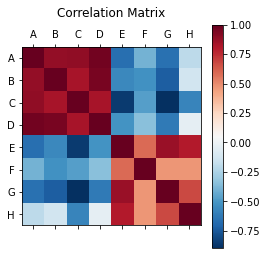

In [5]:
# Search for keywords for covariance circle plots
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 200)
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from google.colab import drive
drive.mount('/content/gdrive')
# #############################################################################
infile = "/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/Genus.Frqs.All.MGs.Joined.csv"
with open(infile, 'r') as f:
  data = f.read() 
  print('Start of file:',repr(data[:50]))
  print('End of file:', repr(data[-50:]))
f.close()
rawlines = data.split('\n')
rawlines.pop()

# specify keywords in the order you them to be plotted
keywords = ['Anaerolinea', 'Bacteroides', 'Clostridium','Syntrophus', 
            'Maribacter', 'Mycobacterium', 'Pseudomonas', 'Shewanella']

omits = ['parabacteroides']

"""
['Anaerolinea', 'Bacteroides', 'Clostridium','Syntrophus', 'Maribacter', 'Mycobacterium', 'Pseudomonas', 'Shewanella']

['Desulfo', 'Nitro']

['Anaerolinea', 'Bacteroides', 'Clostridium','Syntrophus', 
            'Maribacter', 'Mycobacterium', 'Pseudomonas', 'Shewanella']

[ 'Gammaproteobacteria', 'Beggiatoa', 'Deltaproteobacteria', 'Desulfobacterium', 'Nitrosopumilus', 'Bacteroides',
            'Desulfatibacillum', 'Planctomyces', 'Geobacter', 'Desulfococcus' ]
"""      
n_samples = 100
lines =[]
for z in range(n_samples):
  keep = True
  for a in range(len(omits)):    
    if omits[a].lower() in rawlines[z]: 
      keep = False
  if keep == True: lines.append(rawlines[z])
#print('Lengths:', len(rawlines), len(lines))

table, genera, letter = [], [], []
hits = 0
for x in range(len(keywords)):
  for y in range(len(lines)):
    row = lines[y].split(',')
    if keywords[x].lower() in row[0].lower(): 
      #print(row)
      hits +=1
      letter.append(chr(hits + 64))      
      genera.append(row[0])
      for a in range(1, len(row)):
        if float(row[a]) > 0.0: row[a] = 1/float(row[a])
        else: row[a] = 10000
      table.append(row[1:])
print()

frame ={}
for x in range(len(table)):
  frame[ genera[x] ] = table[x]  
#print(frame)

df = pd.DataFrame(frame)
#print('Correlation Matrix:\n', df.corr())
print()
plt.matshow(df.corr(), cmap='RdBu_r')  #RdBu_r, spring, autumn, Reds, plasma, RdPu, Purples
plt.title("Correlation Matrix\n")
plt.xticks(np.arange(len(letter)), letter )
plt.yticks(np.arange(len(letter)), letter )
plt.colorbar()
plt.show()
